# Utility Functions

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

def plot_all(file_name, show=True):
    with open(file_name, 'r') as reader:
        lines = reader.readlines()
        lines = filter(lambda x: x.startswith('truth'), lines)
        lines = [line.strip().split() for line in lines]
        truth = map(lambda x: float(x[1]), lines)
        prediction = map(lambda x: float(x[3]), lines)

    n_steps = len(truth)
    print('number of steps: ', n_steps)

    if show:
        print('Plotting truth signal...')
        ax = plt.gca()
        ax.set_xlabel('Time')
        ax.set_ylabel('Loss')        
        plt.plot(truth, label='True Loss')
        plt.legend()
        plt.show()

    smooth_truth = smooth(np.array(truth), window_len=1000)
    if show:
        print('Plotting smoothed truth signal')
        ax = plt.gca()
        ax.set_xlabel('Time')
        ax.set_ylabel('Loss')        
        plt.plot(smooth_truth, label='smooth true loss')
        plt.legend()
        plt.show()

    if show:
        print('Plotting predicted signal')
        ax = plt.gca()
        ax.set_xlabel('Time')
        ax.set_ylabel('Loss')        
        plt.plot(prediction, label='prediction')
        plt.legend()
        plt.show()

    smooth_prediction = smooth(np.array(prediction), window_len=1000)
    if show:
        print('Plotting smoothed predicted signal')
        plt.plot(smooth_prediction, label='smooth predicted loss')
        plt.legend()
        plt.show()

    t = np.array(range(len(smooth_truth)))

    if show:
        ax = plt.gca()
        ax.set_xlabel('Time')
        ax.set_ylabel('Truth and Prediction')        
        plt.plot(t, smooth_truth, label='Truth')
        plt.plot(t, smooth_prediction, label='Prediction')
        plt.legend()
        plt.show()

    # Running average parameter
    N = 100

    abs_loss = [math.fabs(x - y) for x, y in zip(truth, prediction)]
    sq_loss = [(x-y)**2 for x, y in zip(truth, prediction)]

    if show:
        print('Plotting absolute loss..')
        ax = plt.gca()
        ax.set_xlabel('Time')
        ax.set_ylabel('L1 Loss')        
        plt.plot(abs_loss, label='L1 Loss')
        plt.legend()
        plt.show()

    avg_abs_loss = np.convolve(abs_loss, np.ones((N,))/N, mode='valid')
    if show:
        print('Plotting running average absolute loss..')
        ax = plt.gca()
        ax.set_xlabel('Time')
        ax.set_ylabel('Running Average L1 Loss')
        plt.plot(avg_abs_loss, label='Running Average L1 Loss')
        plt.legend()
        plt.show()

    if show:
        print('Plotting squared loss..')
        ax = plt.gca()
        ax.set_xlabel('Time')
        ax.set_ylabel('Squared Loss')       
        plt.plot(sq_loss, label='Squared Loss')
        plt.legend()
        plt.show()

    avg_sq_loss  = np.convolve(sq_loss, np.ones((N,))/N, mode='valid')
    if show:
        print('Plotting running average squared loss..')
        ax = plt.gca()
        ax.set_xlabel('Time')
        ax.set_ylabel('Running avearge squared loss')
        plt.plot(avg_sq_loss, label='Running average squared loss')
        plt.legend()
        plt.show()
    return smooth_truth, smooth_prediction

# Hamming Loss

In [59]:
!python big_banditlols.py mod::10::4::6 blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update adam 0.01 bag_size=5 loss_fn=hamming --dynet-seed 7263 > hamming.txt

[dynet] random seed: 7263
[dynet] allocating memory: 512MB
[dynet] memory allocation done.

# {'save_best_model_to': None, 'task': 'mod::10::4::6', 'token_vocab_file': None, 'load_initial_model_from': None, 'learning_rate': 0.01, 'loss_fn': 'hamming', 'pos_vocab_file': None, 'opt_method': 'adam', 'supervised': False, 'active': False, 'seqfeats': 'rnn', 'additional_args': ['big_banditlols.py', 'mod::10::4::6', 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'adam', '0.01', 'bag_size=5', 'loss_fn=hamming', '--dynet-seed', '7263'], 'learning_method': 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'initial_embeddings': None}

sq_err     | tr_hamming  de_hamming         N  epoch  rand_dev_truth          rand_dev_pred
20.065607  | 6.000000    4.205000           1      1  [0 1 1 1 1 1         ]  [1 1 1 1 1 1         ]  *
26.597764  | 6.000000    4.205000           2      1  [2 1 1 3 3 1         ]  [1 1 1 1 1 1         ]
14.443288  | 5.2

('number of steps: ', 98304)
Plotting truth signal...


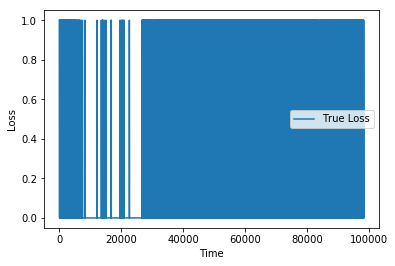

Plotting smoothed truth signal


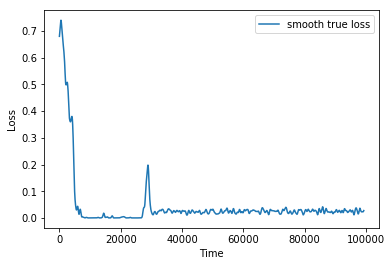

Plotting predicted signal


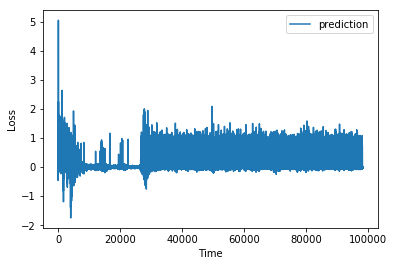

Plotting smoothed predicted signal


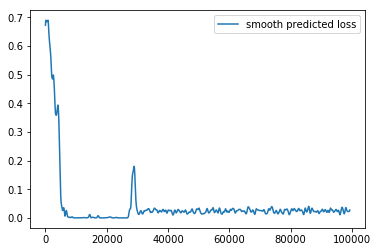

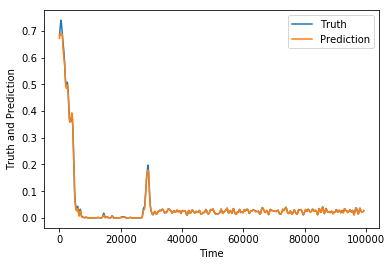

Plotting absolute loss..


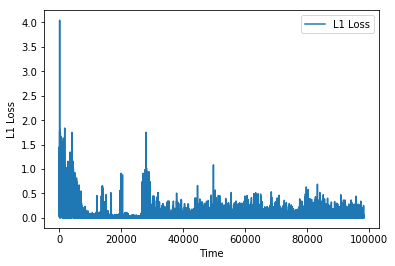

Plotting running average absolute loss..


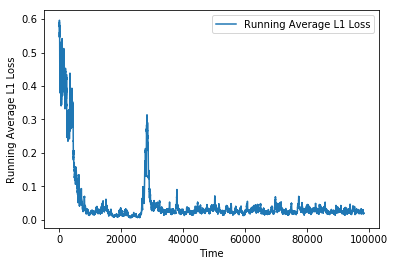

Plotting squared loss..


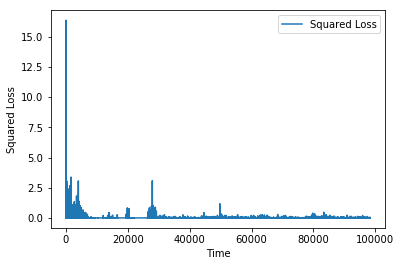

Plotting running average squared loss..


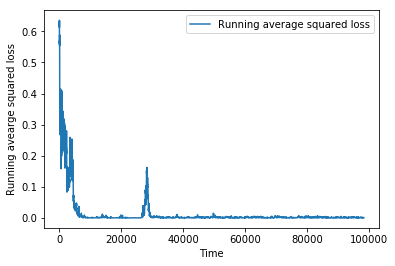

(array([ 0.67988186,  0.6800209 ,  0.68016   , ...,  0.02746017,
         0.02749157,  0.02752311]),
 array([ 0.67232162,  0.67251837,  0.67271439, ...,  0.02729258,
         0.02732477,  0.02735709]))

In [60]:
plot_all('hamming.txt')

# Time Sensitive Hamming Loss

In [64]:
!python big_banditlols.py mod::10::4::6 blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update adam 0.01 bag_size=5 loss_fn=time_sensitive_hamming --dynet-seed 7263 > time_sensitive_hamming.txt

[dynet] random seed: 7263
[dynet] allocating memory: 512MB
[dynet] memory allocation done.

# {'save_best_model_to': None, 'task': 'mod::10::4::6', 'token_vocab_file': None, 'load_initial_model_from': None, 'learning_rate': 0.01, 'loss_fn': 'time_sensitive_hamming', 'pos_vocab_file': None, 'opt_method': 'adam', 'supervised': False, 'active': False, 'seqfeats': 'rnn', 'additional_args': ['big_banditlols.py', 'mod::10::4::6', 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'adam', '0.01', 'bag_size=5', 'loss_fn=time_sensitive_hamming', '--dynet-seed', '7263'], 'learning_method': 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'initial_embeddings': None}

sq_err     | tr_time_s.. de_time_s..        N  epoch  rand_dev_truth          rand_dev_pred
379.449558 | 21.000000   14.693000          1      1  [0 1 1 1 1 1         ]  [1 1 1 1 1 1         ]  *
405.127634 | 21.000000   14.693000          2      1  [2 1 1 3 3 1         ]  [1 1 1 1 

('number of steps: ', 98304)
Plotting truth signal...


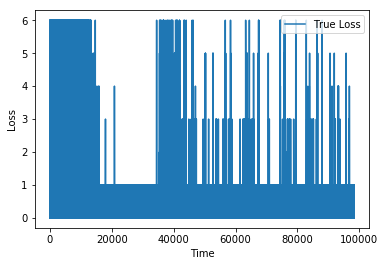

Plotting smoothed truth signal


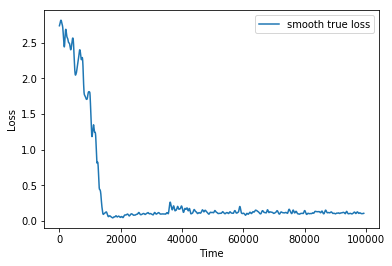

Plotting predicted signal


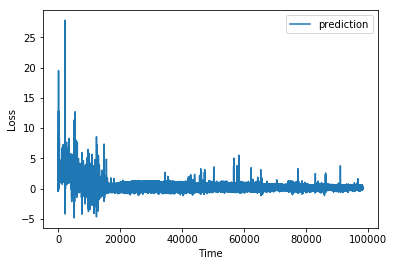

Plotting smoothed predicted signal


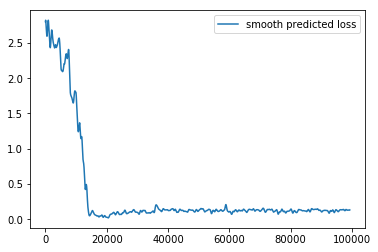

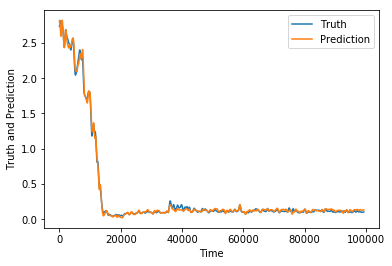

Plotting absolute loss..


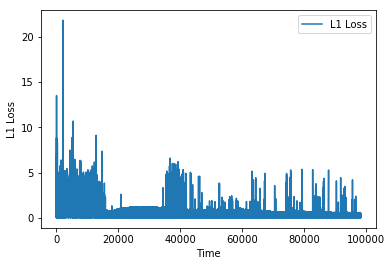

Plotting running average absolute loss..


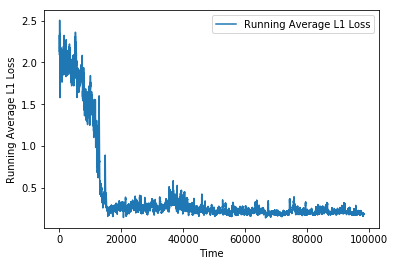

Plotting squared loss..


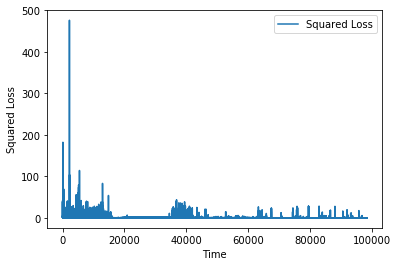

Plotting running average squared loss..


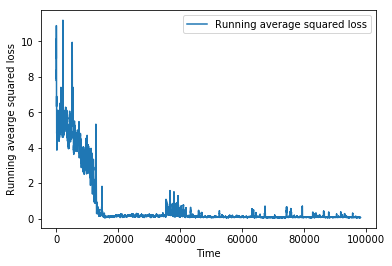

(array([ 2.73624681,  2.73646685,  2.73668552, ...,  0.10569574,
         0.10572415,  0.10575262]),
 array([ 2.80038809,  2.80094321,  2.80149252, ...,  0.13430449,
         0.13433298,  0.13436149]))

In [65]:
plot_all('time_sensitive_hamming.txt')

# Distance Sensitive Hamming Loss

In [66]:
!python big_banditlols.py mod::10::4::6 blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update adam 0.01 bag_size=5 loss_fn=distance_sensitive_hamming --dynet-seed 7263 > distance_sensitive_hamming.txt

[dynet] random seed: 7263
[dynet] allocating memory: 512MB
[dynet] memory allocation done.

# {'save_best_model_to': None, 'task': 'mod::10::4::6', 'token_vocab_file': None, 'load_initial_model_from': None, 'learning_rate': 0.01, 'loss_fn': 'distance_sensitive_hamming', 'pos_vocab_file': None, 'opt_method': 'adam', 'supervised': False, 'active': False, 'seqfeats': 'rnn', 'additional_args': ['big_banditlols.py', 'mod::10::4::6', 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'adam', '0.01', 'bag_size=5', 'loss_fn=distance_sensitive_hamming', '--dynet-seed', '7263'], 'learning_method': 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'initial_embeddings': None}

sq_err     | tr_distan.. de_distan..        N  epoch  rand_dev_truth          rand_dev_pred
55.942397  | 9.000000    5.393000           1      1  [0 1 1 1 1 1         ]  [1 1 1 1 1 1         ]  *
85.815457  | 10.000000   5.393000           2      1  [2 1 1 3 3 1         ]  [

('number of steps: ', 98304)
Plotting truth signal...


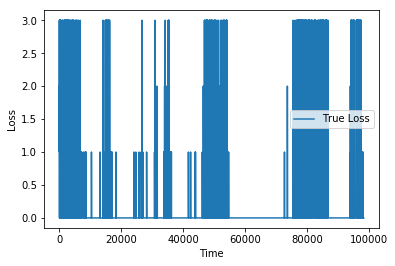

Plotting smoothed truth signal


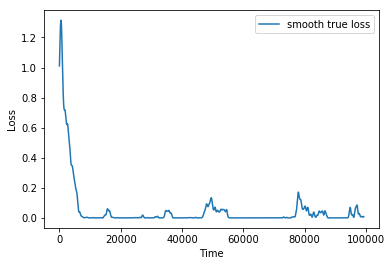

Plotting predicted signal


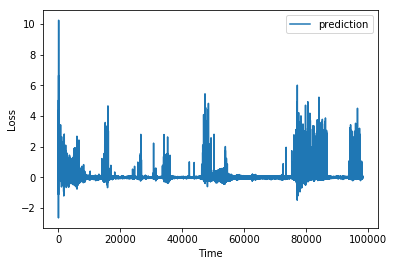

Plotting smoothed predicted signal


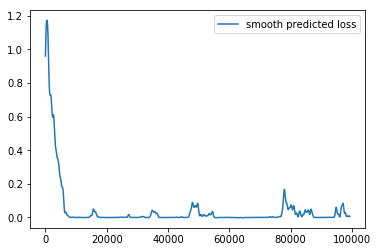

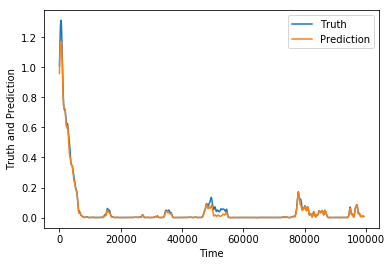

Plotting absolute loss..


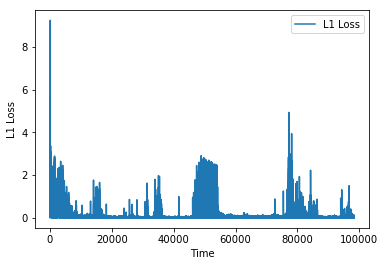

Plotting running average absolute loss..


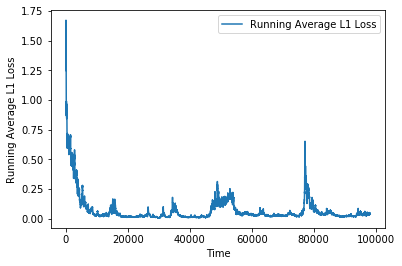

Plotting squared loss..


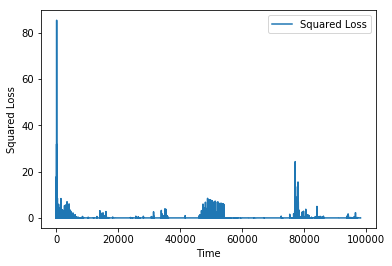

Plotting running average squared loss..


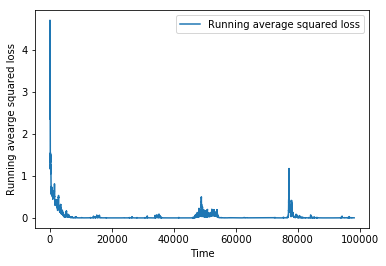

(array([ 1.01060685,  1.01150701,  1.01240785, ...,  0.00747109,
         0.00745671,  0.00744271]),
 array([ 0.96026593,  0.96113686,  0.96200792, ...,  0.00626365,
         0.00624805,  0.00623283]))

In [67]:
plot_all('distance_sensitive_hamming.txt')

# Hamming Loss + L2 Distance (non-additive)

In [68]:
!python big_banditlols.py mod::10::4::6 blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update adam 0.01 bag_size=5 loss_fn=euclidean_hamming --dynet-seed 7263 > hamming_l2.txt

[dynet] random seed: 7263
[dynet] allocating memory: 512MB
[dynet] memory allocation done.

# {'save_best_model_to': None, 'task': 'mod::10::4::6', 'token_vocab_file': None, 'load_initial_model_from': None, 'learning_rate': 0.01, 'loss_fn': 'euclidean_hamming', 'pos_vocab_file': None, 'opt_method': 'adam', 'supervised': False, 'active': False, 'seqfeats': 'rnn', 'additional_args': ['big_banditlols.py', 'mod::10::4::6', 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'adam', '0.01', 'bag_size=5', 'loss_fn=euclidean_hamming', '--dynet-seed', '7263'], 'learning_method': 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'initial_embeddings': None}

sq_err     | tr_euclid.. de_euclid..        N  epoch  rand_dev_truth          rand_dev_pred
0.862957   | 2.449490    2.030963           1      1  [0 1 1 1 1 1         ]  [1 1 1 1 1 1         ]  *
2.808199   | 2.449490    2.030963           2      1  [2 1 1 3 3 1         ]  [1 1 1 1 1 1       

('number of steps: ', 98304)
Plotting truth signal...


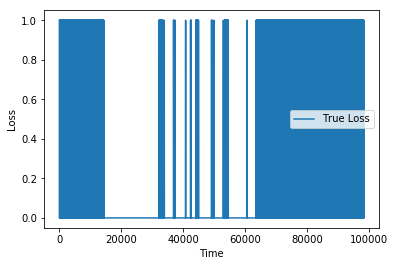

Plotting smoothed truth signal


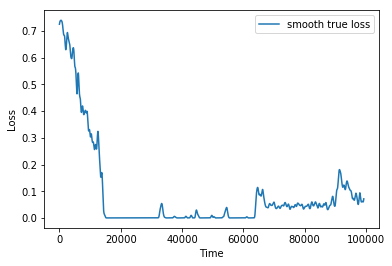

Plotting predicted signal


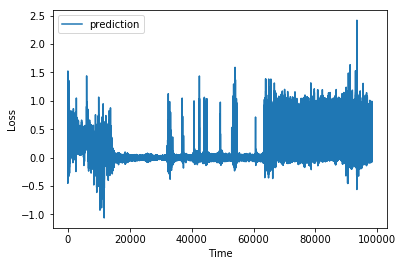

Plotting smoothed predicted signal


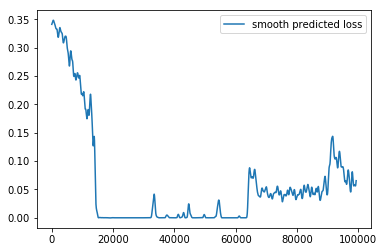

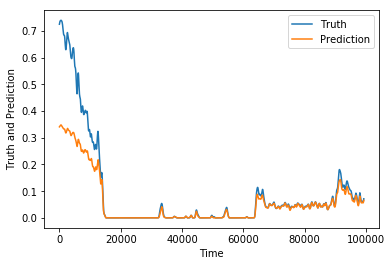

Plotting absolute loss..


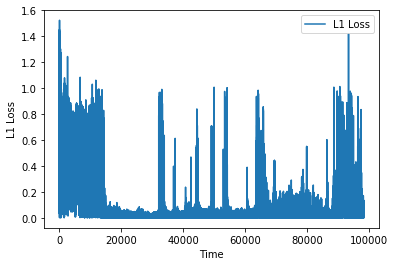

Plotting running average absolute loss..


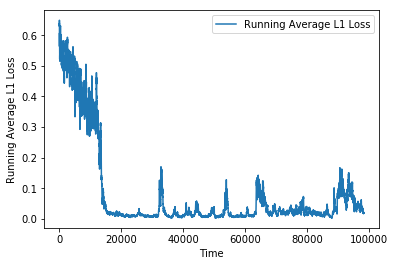

Plotting squared loss..


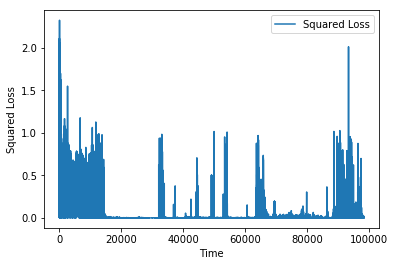

Plotting running average squared loss..


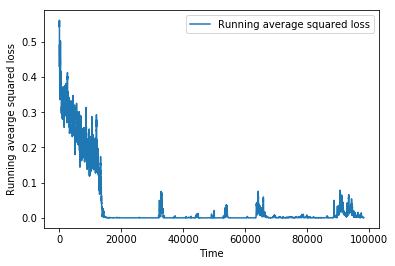

(array([ 0.72542233,  0.72550191,  0.72558114, ...,  0.0712776 ,
         0.07136728,  0.07145723]),
 array([ 0.34091268,  0.34093655,  0.34096036, ...,  0.06526316,
         0.0653307 ,  0.0653984 ]))

In [69]:
plot_all('hamming_l2.txt')

# Time Sensitive L2

In [70]:
!python big_banditlols.py mod::10::4::6 blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update adam 0.01 bag_size=5 loss_fn=time_sensitive_hamming_l2 --dynet-seed 7263 > time_sensitive_hamming_l2.txt

[dynet] random seed: 7263
[dynet] allocating memory: 512MB
[dynet] memory allocation done.

# {'save_best_model_to': None, 'task': 'mod::10::4::6', 'token_vocab_file': None, 'load_initial_model_from': None, 'learning_rate': 0.01, 'loss_fn': 'time_sensitive_hamming_l2', 'pos_vocab_file': None, 'opt_method': 'adam', 'supervised': False, 'active': False, 'seqfeats': 'rnn', 'additional_args': ['big_banditlols.py', 'mod::10::4::6', 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'adam', '0.01', 'bag_size=5', 'loss_fn=time_sensitive_hamming_l2', '--dynet-seed', '7263'], 'learning_method': 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'initial_embeddings': None}

sq_err     | tr_time_s.. de_time_s..        N  epoch  rand_dev_truth          rand_dev_pred
64.302068  | 9.539392    7.822077           1      1  [0 1 1 1 1 1         ]  [1 1 1 1 1 1         ]  *
75.351886  | 9.539392    7.822077           2      1  [2 1 1 3 3 1         ]  [1 

('number of steps: ', 98304)
Plotting truth signal...


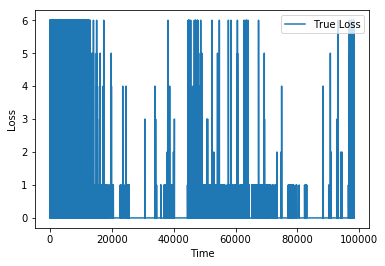

Plotting smoothed truth signal


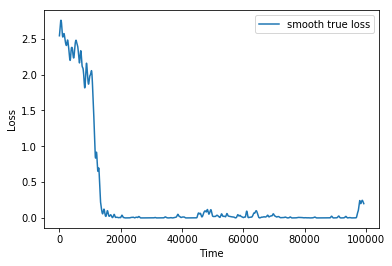

Plotting predicted signal


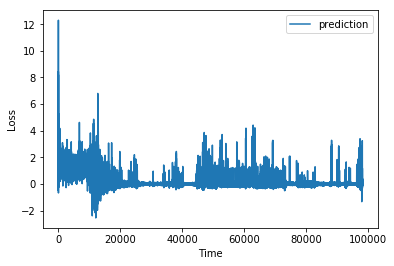

Plotting smoothed predicted signal


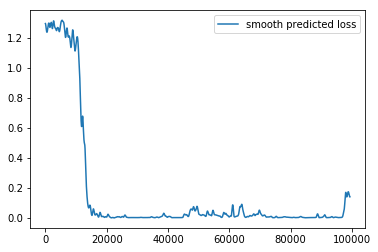

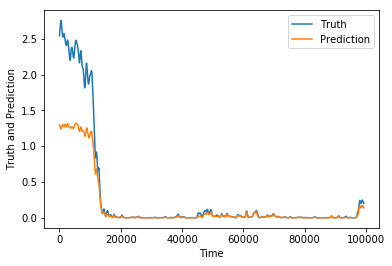

Plotting absolute loss..


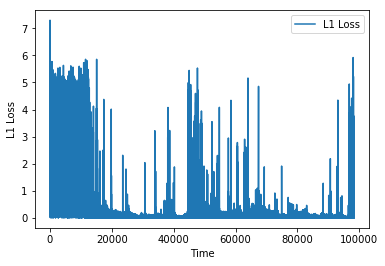

Plotting running average absolute loss..


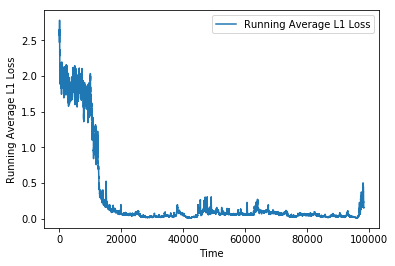

Plotting squared loss..


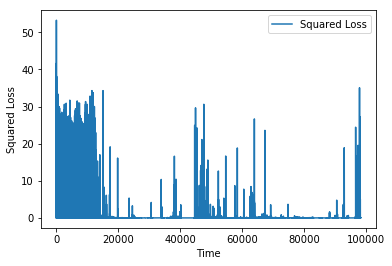

Plotting running average squared loss..


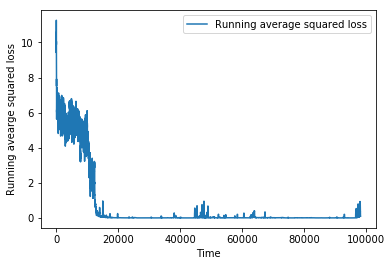

(array([ 2.54107028,  2.54138473,  2.54170194, ...,  0.1992602 ,
         0.19921644,  0.19917394]),
 array([ 1.29679882,  1.29677106,  1.29674264, ...,  0.13833989,
         0.13835013,  0.13836139]))

In [71]:
plot_all('time_sensitive_hamming_l2.txt')

# Distance Sensitive + L2

In [72]:
!python big_banditlols.py mod::10::4::6 blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update adam 0.01 bag_size=5 loss_fn=distance_sensitive_hamming_l2 --dynet-seed 7263 > distance_sensitive_hamming_l2.txt

[dynet] random seed: 7263
[dynet] allocating memory: 512MB
[dynet] memory allocation done.

# {'save_best_model_to': None, 'task': 'mod::10::4::6', 'token_vocab_file': None, 'load_initial_model_from': None, 'learning_rate': 0.01, 'loss_fn': 'distance_sensitive_hamming_l2', 'pos_vocab_file': None, 'opt_method': 'adam', 'supervised': False, 'active': False, 'seqfeats': 'rnn', 'additional_args': ['big_banditlols.py', 'mod::10::4::6', 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'adam', '0.01', 'bag_size=5', 'loss_fn=distance_sensitive_hamming_l2', '--dynet-seed', '7263'], 'learning_method': 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'initial_embeddings': None}

sq_err     | tr_distan.. de_distan..        N  epoch  rand_dev_truth          rand_dev_pred
5.534013   | 3.872983    2.716987           1      1  [0 1 1 1 1 1         ]  [1 1 1 1 1 1         ]  *
13.125953  | 4.334407    2.716987           2      1  [2 1 1 3 3 1       

('number of steps: ', 98304)
Plotting truth signal...


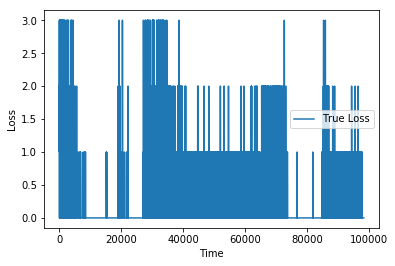

Plotting smoothed truth signal


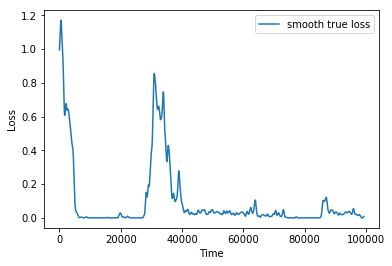

Plotting predicted signal


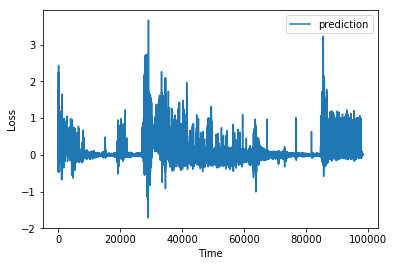

Plotting smoothed predicted signal


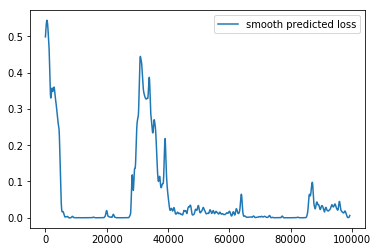

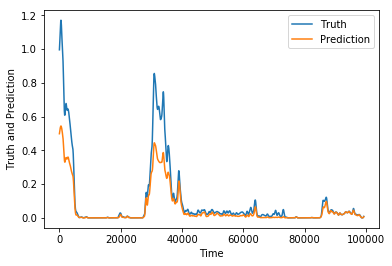

Plotting absolute loss..


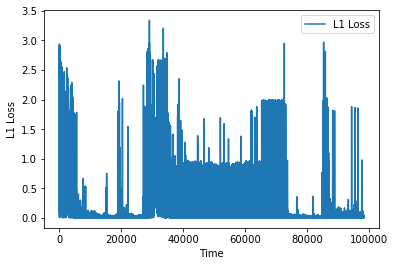

Plotting running average absolute loss..


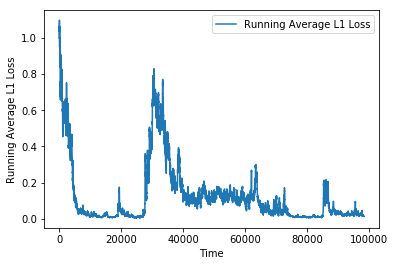

Plotting squared loss..


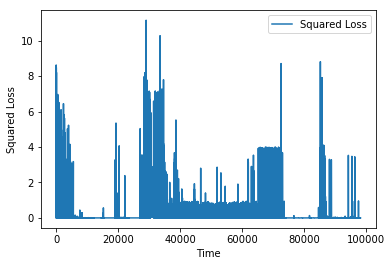

Plotting running average squared loss..


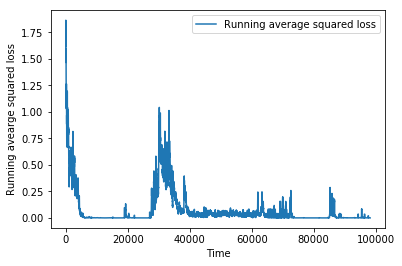

(array([ 0.99593167,  0.99624533,  0.99655924, ...,  0.00850684,
         0.00854162,  0.00857638]),
 array([ 0.49855356,  0.49869383,  0.49883407, ...,  0.00623254,
         0.00625606,  0.00627959]))

In [73]:
plot_all('distance_sensitive_hamming_l2.txt')

# Distance + L5

In [74]:
!python big_banditlols.py mod::10::4::6 blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update adam 0.01 bag_size=5 loss_fn=distance_sensitive_hamming_l5 --dynet-seed 7263 > distance_sensitive_hamming_l5.txt

[dynet] random seed: 7263
[dynet] allocating memory: 512MB
[dynet] memory allocation done.

# {'save_best_model_to': None, 'task': 'mod::10::4::6', 'token_vocab_file': None, 'load_initial_model_from': None, 'learning_rate': 0.01, 'loss_fn': 'distance_sensitive_hamming_l5', 'pos_vocab_file': None, 'opt_method': 'adam', 'supervised': False, 'active': False, 'seqfeats': 'rnn', 'additional_args': ['big_banditlols.py', 'mod::10::4::6', 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'adam', '0.01', 'bag_size=5', 'loss_fn=distance_sensitive_hamming_l5', '--dynet-seed', '7263'], 'learning_method': 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'initial_embeddings': None}

sq_err     | tr_distan.. de_distan..        N  epoch  rand_dev_truth          rand_dev_pred
0.972802   | 2.506842    1.962214           1      1  [0 1 1 1 1 1         ]  [1 1 1 1 1 1         ]  *
4.819870   | 2.858591    1.963038           2      1  [2 1 1 3 3 1       

('number of steps: ', 98304)
Plotting truth signal...


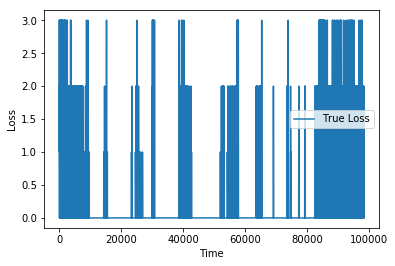

Plotting smoothed truth signal


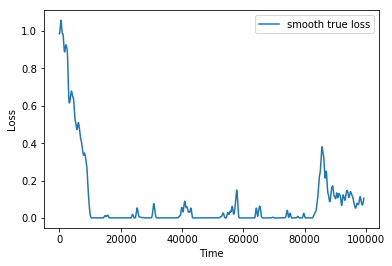

Plotting predicted signal


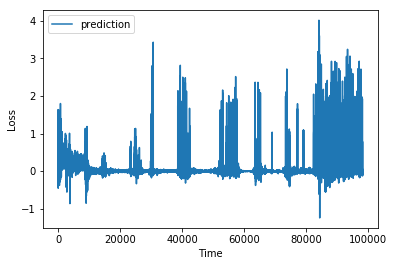

Plotting smoothed predicted signal


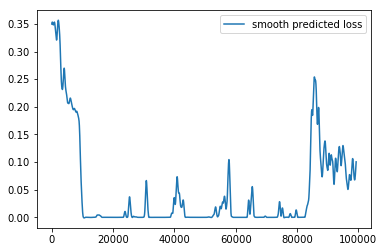

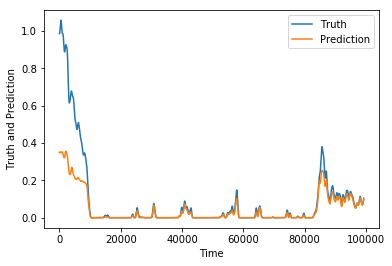

Plotting absolute loss..


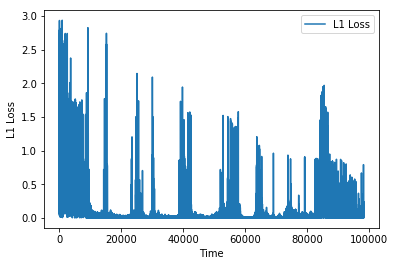

Plotting running average absolute loss..


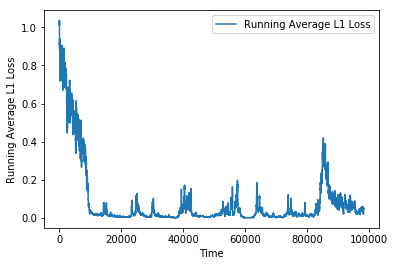

Plotting squared loss..


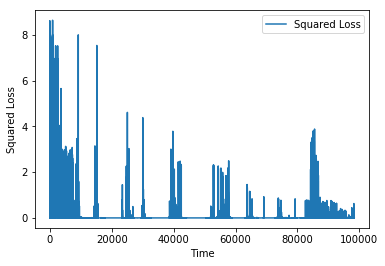

Plotting running average squared loss..


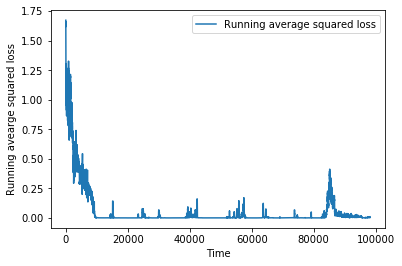

(array([ 0.98672064,  0.98672896,  0.98673783, ...,  0.10458287,
         0.10468493,  0.10478658]),
 array([ 0.34970857,  0.34975425,  0.34979976, ...,  0.10024592,
         0.10032614,  0.10040593]))

In [75]:
plot_all('distance_sensitive_hamming_l5.txt')

# Time + L5

In [76]:
!python big_banditlols.py mod::10::4::6 blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update adam 0.01 bag_size=5 loss_fn=time_sensitive_hamming_l5 --dynet-seed 7263 > time_sensitive_hamming_l5.txt

[dynet] random seed: 7263
[dynet] allocating memory: 512MB
[dynet] memory allocation done.

# {'save_best_model_to': None, 'task': 'mod::10::4::6', 'token_vocab_file': None, 'load_initial_model_from': None, 'learning_rate': 0.01, 'loss_fn': 'time_sensitive_hamming_l5', 'pos_vocab_file': None, 'opt_method': 'adam', 'supervised': False, 'active': False, 'seqfeats': 'rnn', 'additional_args': ['big_banditlols.py', 'mod::10::4::6', 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'adam', '0.01', 'bag_size=5', 'loss_fn=time_sensitive_hamming_l5', '--dynet-seed', '7263'], 'learning_method': 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'initial_embeddings': None}

sq_err     | tr_time_s.. de_time_s..        N  epoch  rand_dev_truth          rand_dev_pred
25.453393  | 6.565671    5.917854           1      1  [0 1 1 1 1 1         ]  [1 1 1 1 1 1         ]  *
32.707568  | 6.565671    5.917854           2      1  [2 1 1 3 3 1         ]  [1 

('number of steps: ', 98304)
Plotting truth signal...


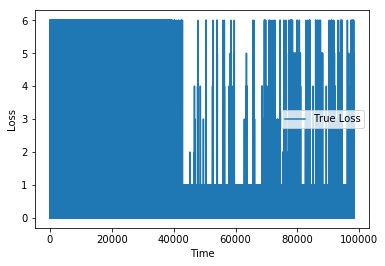

Plotting smoothed truth signal


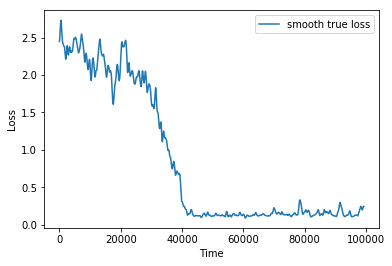

Plotting predicted signal


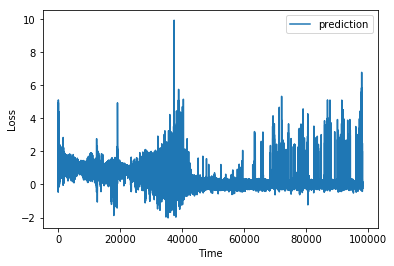

Plotting smoothed predicted signal


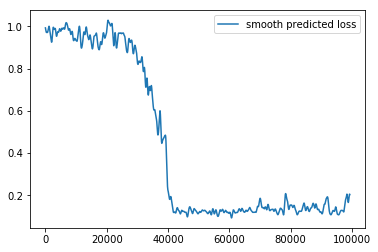

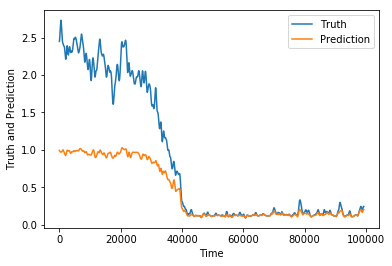

Plotting absolute loss..


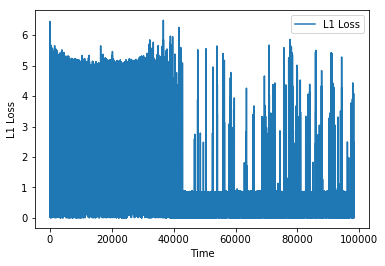

Plotting running average absolute loss..


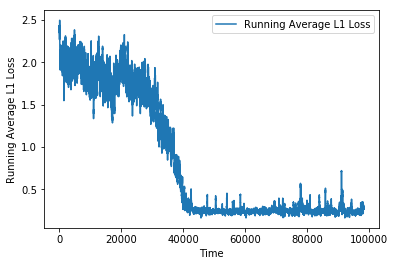

Plotting squared loss..


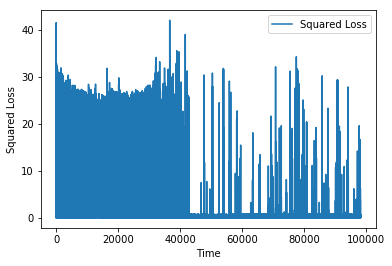

Plotting running average squared loss..


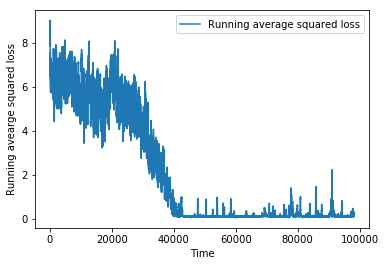

(array([ 2.44817364,  2.44846862,  2.44876572, ...,  0.24390103,
         0.24382216,  0.24374184]),
 array([ 0.99334542,  0.99328657,  0.99322737, ...,  0.20291608,
         0.2028454 ,  0.20277369]))

In [77]:
plot_all('time_sensitive_hamming_l5.txt')

# Final Plots

('number of steps: ', 98304)
('number of steps: ', 98304)
('number of steps: ', 98304)


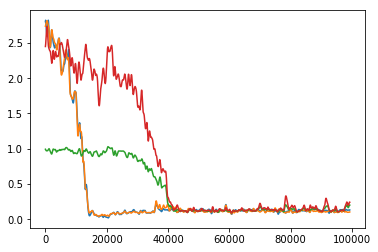

In [78]:
t1, p1 = plot_all('time_sensitive_hamming.txt', show=False)
t2, p2 = plot_all('time_sensitive_hamming_l2.txt', show=False)
t5, p5 = plot_all('time_sensitive_hamming_l5.txt', show=False)
plt.show()
plt.plot(p1)
plt.plot(t1)
# plt.plot(t, p2)
# plt.plot(t, t2)
plt.plot(p5)
plt.plot(t5)
plt.show()

('number of steps: ', 98304)
('number of steps: ', 98304)
('number of steps: ', 98304)


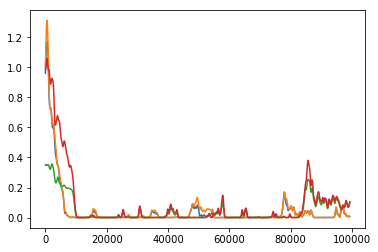

In [79]:
t1, p1 = plot_all('distance_sensitive_hamming.txt', show=False)
t2, p2 = plot_all('distance_sensitive_hamming_l2.txt', show=False)
t5, p5 = plot_all('distance_sensitive_hamming_l5.txt', show=False)
plt.show()
plt.plot(p1)
plt.plot(t1)
# plt.plot(t, p2)
# plt.plot(t, t2)
plt.plot(p5)
plt.plot(t5)
plt.show()

('number of steps: ', 98304)
('number of steps: ', 98304)
('number of steps: ', 98304)


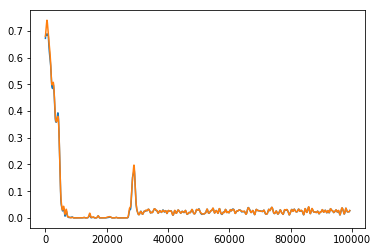

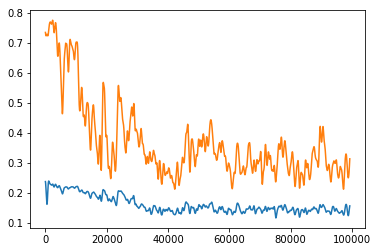

In [63]:
t1, p1 = plot_all('hamming.txt', show=False)
t2, p2 = plot_all('hamming_l2.txt', show=False)
t5, p5 = plot_all('hamming_l5.txt', show=False)
plt.show()
plt.plot(p1)
plt.plot(t1)
plt.show()
# plt.plot(t, p2)
# plt.plot(t, t2)
plt.plot(p5)
plt.plot(t5)
plt.show()

# Hamming L5

In [ ]:
!python big_banditlols.py mod::10::4::6 blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update adam 0.01 bag_size=5 loss_fn=hamming_l5 --dynet-seed 7263 > hamming_l5.txt

[dynet] random seed: 7263
[dynet] allocating memory: 512MB
[dynet] memory allocation done.

# {'save_best_model_to': None, 'task': 'mod::10::4::6', 'token_vocab_file': None, 'load_initial_model_from': None, 'learning_rate': 0.01, 'loss_fn': 'hamming_l5', 'pos_vocab_file': None, 'opt_method': 'adam', 'supervised': False, 'active': False, 'seqfeats': 'rnn', 'additional_args': ['big_banditlols.py', 'mod::10::4::6', 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'adam', '0.01', 'bag_size=5', 'loss_fn=hamming_l5', '--dynet-seed', '7263'], 'learning_method': 'blols::mtr::bootstrap::upc::oft::multidev::greedy_predict::greedy_update', 'initial_embeddings': None}

sq_err     | tr_hammin.. de_hammin..        N  epoch  rand_dev_truth          rand_dev_pred
0.008022   | 1.430969    1.324285           1      1  [0 1 1 1 1 1         ]  [1 1 1 1 1 1         ]  *
1.739243   | 1.430969    1.324285           2      1  [2 1 1 3 3 1         ]  [1 1 1 1 1 1         ]
1.467052  

('number of steps: ', 98304)
Plotting truth signal...


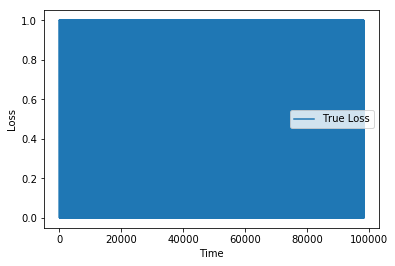

Plotting smoothed truth signal


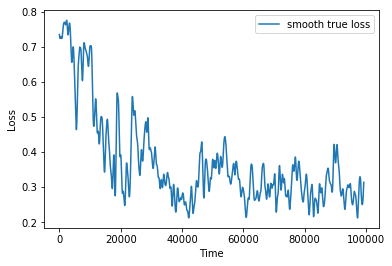

Plotting predicted signal


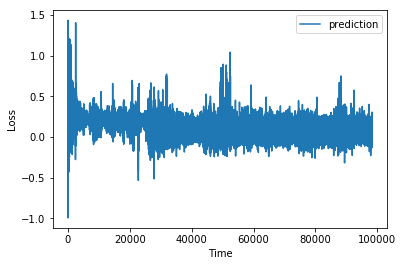

Plotting smoothed predicted signal


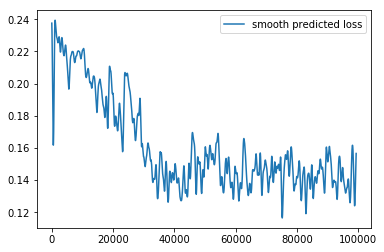

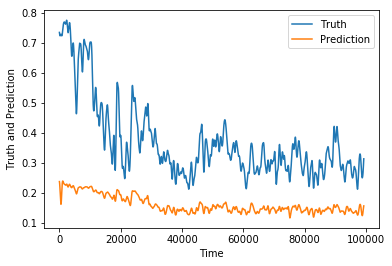

Plotting absolute loss..


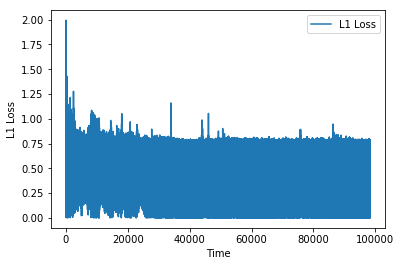

Plotting running average absolute loss..


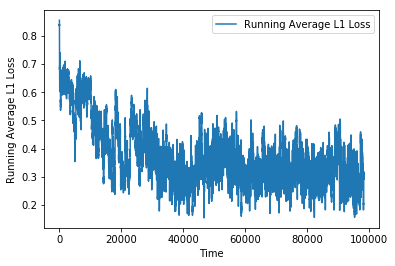

Plotting squared loss..


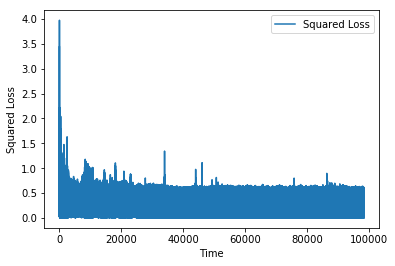

Plotting running average squared loss..


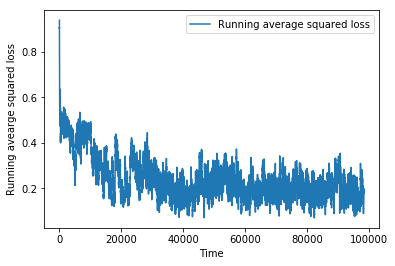

(array([ 0.73472349,  0.73462345,  0.73452362, ...,  0.31311075,
         0.31328244,  0.31345327]),
 array([ 0.23753306,  0.23748284,  0.2374318 , ...,  0.15639518,
         0.15645225,  0.15650904]))

In [56]:
plot_all('hamming_l5.txt')